# Fuhlsbüttel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc 
import scipy.stats as st

In [2]:
# Import data from CSV file to pandas DataFrame 
df = pd.read_csv("data/fuhlsbuettel.csv", sep=",")

In [5]:
df.head()

,Date,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration,MaxWindGust
0,20.07.2015,11.4,21.7,17.0,0.1,9.2,5
1,21.07.2015,14.3,23.9,20.1,1.1,8.7,6
2,22.07.2015,14.4,25.7,19.8,0.0,9.7,6
3,23.07.2015,9.9,19.8,16.0,0.0,4.6,6
4,24.07.2015,8.9,24.4,17.8,9.4,6.3,6


In [6]:
# Copy the values in the column named 'SunshineDuration' to an array with the appropiate length 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
SunshineDuration = df[['SunshineDuration']].values.reshape(len(df))

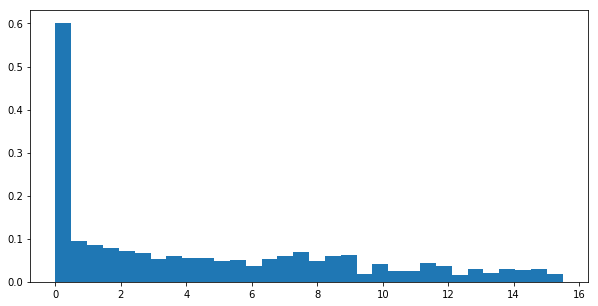

In [14]:
plt.figure(figsize=(10, 5))
plt.hist(SunshineDuration, 32, density=True)
plt.show()

In [13]:
df.describe()

,MinTemp,MaxTemp,AverageTemp,Precipitation,SunshineDuration
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,6.299283,14.236380,10.351882,2.209229,4.542204
std,6.236178,8.164404,6.951017,4.515076,4.523105
min,-13.100000,-7.300000,-10.100000,0.000000,0.000000
25%,1.500000,7.800000,4.900000,0.000000,0.200000
50%,6.600000,13.900000,10.300000,0.200000,3.250000
75%,11.300000,20.725000,16.100000,2.200000,7.800000
max,20.000000,35.500000,27.100000,37.100000,15.500000


In [29]:
df_Sunshine = pd.DataFrame(SunshineDuration).transpose()

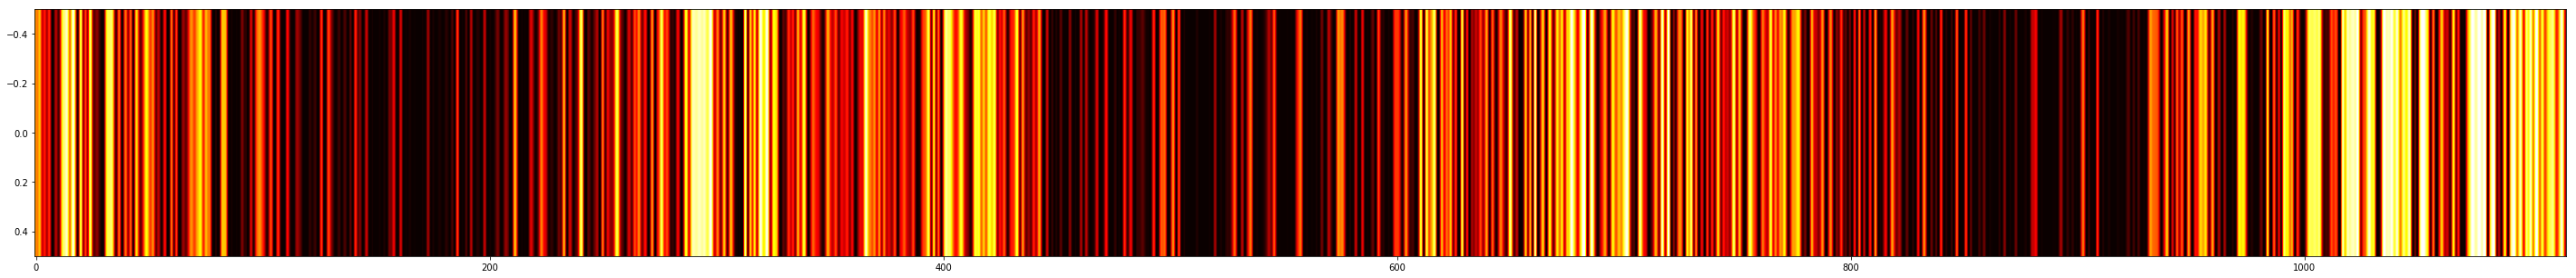

In [33]:
plt.figure(figsize=(50, 5))
plt.imshow (df_Sunshine, cmap='hot', interpolation='lanczos', aspect='auto')

In [34]:
# Copy the values in the column named 'SunshineDuration' to an array with the appropiate length 
# see https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
AverageTemp = df[['AverageTemp']].values.reshape(len(df))

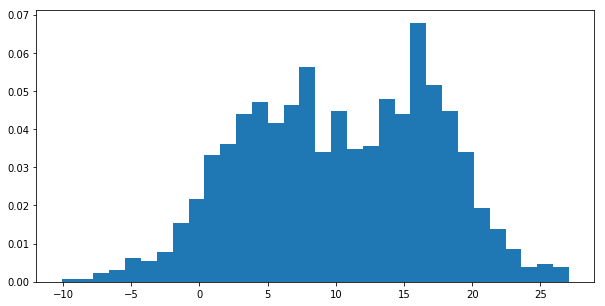

In [35]:
plt.figure(figsize=(10, 5))
plt.hist(AverageTemp, 32, density=True)
plt.show()

In [36]:
df_AverageTemp = pd.DataFrame(AverageTemp).transpose()

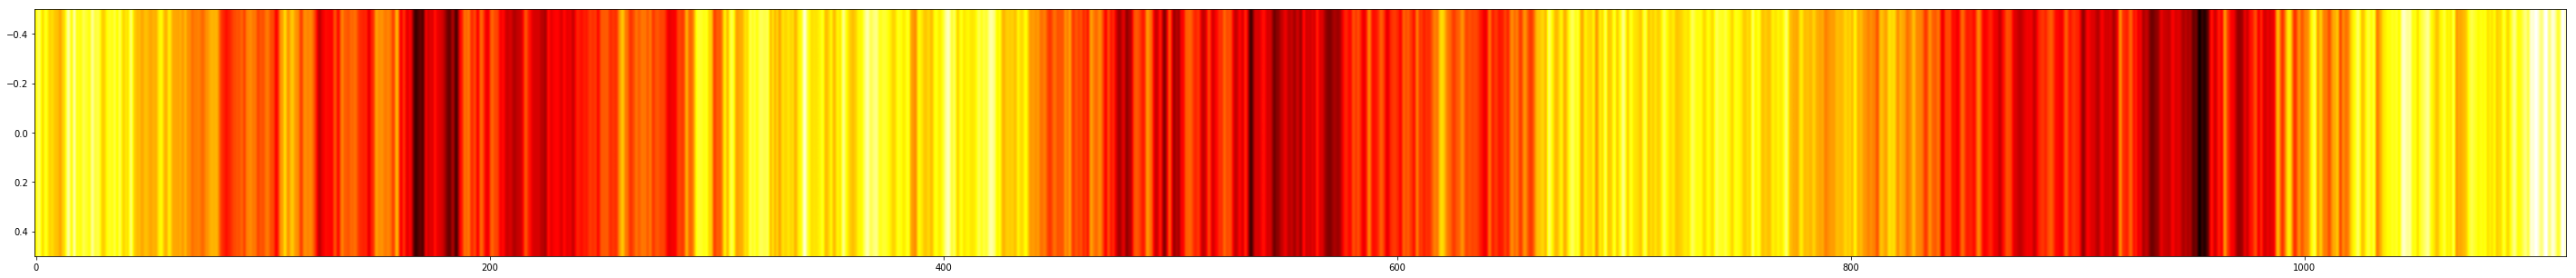

In [38]:
plt.figure(figsize=(50, 5))
plt.imshow (df_AverageTemp, cmap='hot', interpolation='lanczos', aspect='auto')